In [146]:
from numpy import random
import pandas as pd
import numpy as np
import random as rd
from faker import Faker
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as ptl
from sklearn.preprocessing import MaxAbsScaler
abs_scaler = MaxAbsScaler()


fake = Faker("pt-BR")


In [3]:
def gerar_dados(quantidade_de_vendas = 500, quantidade_de_clientes = 200):

    # Tabela de produtos
    nome_dos_produtos = ["morango", "melancia", "banana", "uva", "batata", "berinjela", "abobrinha", "alface", "couve-flor", "feijão", "arroz", "macarrão"]
    preco_produtos = [7.99, 1.49, 5.99, 7.47, 3.99, 11.99, 3.50, 0.98, 5.48, 8.45, 20.31, 2.48]
    prateleira_dos_produtos = ["1A", "1C", "1B", "1D", "2B", "2D", "2A", "2C", "2E", "3B", "3A", "3C"]
    estoque_produtos = [50, 20, 40, 36, 47, 12, 19, 25, 20, 43, 80, 38]
    unidade_de_medida_estoque = ["bandejas", "unidades", "kg", "bandejas", "kg", "kg", "kg", "pés", "pés", "kg", "kg", "pacotes"]
    imagem = ["morango-alt.png", "melancia.jpg", "banana.png", "uva-alt.png", "batata.JPEG", "beringela.jpg", "abobrinha.JPEG", "alface.png", "couve-flor.png", "feijao.png", "arroz.png", "macarrao.png"]

    produtos = {
        "id": list(range(len(nome_dos_produtos))),
        "nome": nome_dos_produtos,
        "preco": preco_produtos,
        "prateleira": prateleira_dos_produtos,
        "estoque": estoque_produtos,
        "unidade_de_medida_de_estoque": unidade_de_medida_estoque
    }

    produtos = pd.DataFrame(produtos)

    # Tabela de clientes
    clientes = {
        'id': list(range(quantidade_de_clientes)),
        'nome': [],
        'nascimento': [],
        'endereço':[],
        'cpf': [],
        'telefone': [],
        'usuario': [],
        'senha': []
    }

    for id in clientes['id']:
        clientes['nome'].append(fake.name())
        clientes['nascimento'].append(fake.date_of_birth(minimum_age = 18, maximum_age = 73))
        clientes['endereço'].append(fake.address())
        clientes['cpf'].append(fake.cpf())
        clientes['telefone'].append(fake.phone_number())
        clientes['usuario'].append(fake.user_name())
        clientes['senha'].append(fake.password(12))
        
    clientes = pd.DataFrame(clientes)

    # Tabela de vendas
    datas = np.arange(np.datetime64('2021-11-01'), np.datetime64('2021-12-01'))
    probabilidade = np.linspace(1, 2, num=datas.size)
    probabilidade = probabilidade / probabilidade.sum()
    datas = np.random.choice(datas, p=probabilidade, size=quantidade_de_vendas)
    datas.sort()
    vendas = {
        'id' : [],
        'id_cliente' : [],
        'data' : []
    }
    for id, data in enumerate(datas):
        vendas['id'].append(id)
        vendas['id_cliente'].append(np.random.choice(clientes['id']))
        vendas['data'].append(data)

    vendas = pd.DataFrame(vendas)

    # Tabela intermediária entre vendas e produtos
    venda_produtos = {
        'id_vendas' : [],
        'id_produto' : [],
        'quantidade' : []
    }

    for id in range(quantidade_de_vendas):
        venda_produtos['id_vendas'].append(vendas['id'][id])
        venda_produtos['id_produto'].append(np.random.choice(produtos['id']))
        venda_produtos['quantidade'].append(random.randint(1, 5))

    for id in range(4 * quantidade_de_vendas):
        venda_produtos['id_vendas'].append(np.random.choice(clientes['id']))
        venda_produtos['id_produto'].append(np.random.choice(produtos['id']))
        venda_produtos['quantidade'].append(random.randint(1, 5))

    venda_produtos = pd.DataFrame(venda_produtos)

    return (produtos,clientes,vendas,venda_produtos)



In [134]:
produtos = gerar_dados()[0]
clientes = gerar_dados()[1]
vendas = gerar_dados()[2]
venda_produtos = gerar_dados()[3]

In [135]:
preco = produtos[['id','preco']]
preco.rename(columns={"id": "id_produto"}, inplace = 1)
venda_preco = pd.merge(venda_produtos, preco, how= 'inner', on= 'id_produto')
venda_preco['total_gasto'] = venda_preco['quantidade']*venda_preco['preco']
venda_preco_prod = venda_preco.groupby('id_produto').sum()


C:\Users\Pichau\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'morango'),
  Text(1, 0, 'melancia'),
  Text(2, 0, 'banana'),
  Text(3, 0, 'uva'),
  Text(4, 0, 'batata'),
  Text(5, 0, 'berinjela'),
  Text(6, 0, 'abobrinha'),
  Text(7, 0, 'alface'),
  Text(8, 0, 'couve-flor'),
  Text(9, 0, 'feijão'),
  Text(10, 0, 'arroz'),
  Text(11, 0, 'macarrão')])

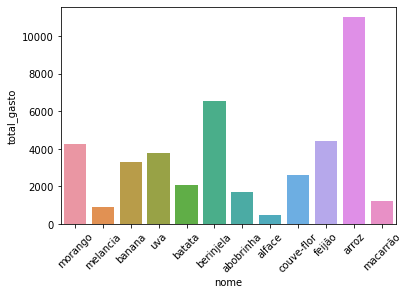

In [136]:
#Organizando os dados
venda_preco_prod['id'] = range(len(venda_preco_prod['total_gasto']))
nome_prod = produtos[['nome', 'id']]
venda_preco_prod = pd.merge(venda_preco_prod, nome_prod, how= 'inner', on= 'id')
#Plotando o gráfico
sns.barplot(x='nome', y="total_gasto", data=venda_preco_prod)
plt.xticks(rotation=45)

In [137]:
vendas['dia_sem'] = vendas['data'].dt.weekday
venda_preco.rename(columns={"id_vendas": "id"}, inplace = 1)
vendas_dia = pd.merge(vendas, venda_preco, how= 'inner', on= 'id')

In [138]:
total_gasto_sem = vendas_dia.groupby(['dia_sem']).sum()
total_gasto_sem['dia'] = range(len(total_gasto_sem['total_gasto']))
#Plotando Gráfico
fig = px.bar(total_gasto_sem,
             x='dia', y="total_gasto", height=700, width=700,
             barmode='stack')
fig.update_layout(title = 'Ganhos totais por dia da semana')
fig.update_xaxes(title = 'Dia da semana')
fig.update_yaxes(title = 'Total gasto')
fig.show()

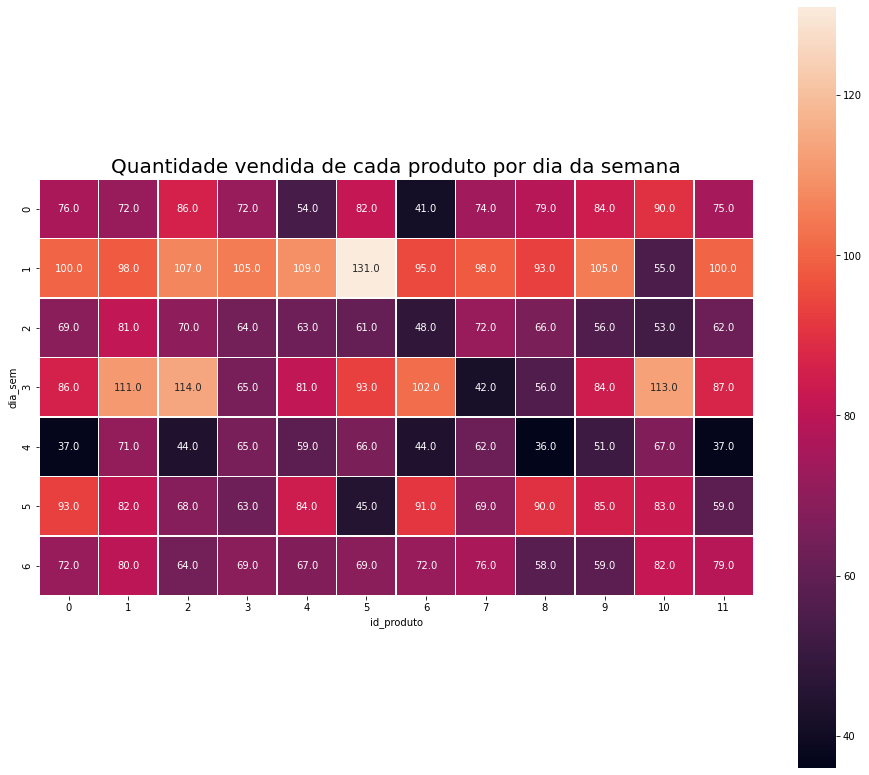

In [139]:
quantidade_vendida_dia = vendas_dia.pivot_table('quantidade', index='dia_sem', columns='id_produto', aggfunc=sum)
f,ax = plt.subplots(figsize=(16, 14))
sns.heatmap(quantidade_vendida_dia, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)

plt.title('Quantidade vendida de cada produto por dia da semana', size=20);

In [140]:
vendas_dia_quant = vendas_dia.drop(['id','id_cliente','preco', 'total_gasto'],axis=1)



In [141]:
vendas_mensais

,id,id_cliente,dia_sem,id_produto,quantidade,preco,total_gasto
data,,,,,,,
2021-11-01,416,7014,0,557,257,611.93,1509.41
2021-11-02,3359,20220,190,1057,457,1292.32,2885.80
2021-11-03,3284,8147,210,596,249,703.26,1611.66
2021-11-04,4316,4730,321,536,263,657.13,1649.27
2021-11-05,5391,12897,420,619,251,696.80,1689.38
2021-11-06,10753,18008,835,899,434,1083.60,2722.50
2021-11-07,11636,14638,888,800,345,984.99,2315.38
2021-11-08,17532,12107,0,994,471,1260.94,3270.68
2021-11-09,30032,30636,265,1365,668,1812.92,4614.66


In [142]:
vendas_dia_quant = vendas_dia.drop(['id','id_cliente','preco', 'total_gasto'],axis=1)
nome_prod.rename(columns={"id": "id_produto"}, inplace = 1)
vendas_dia2 = pd.merge(vendas_dia, nome_prod, how= 'inner', on= 'id_produto')
quantidade_vendida_dia = vendas_dia2.pivot_table('quantidade', index='dia_sem', columns='nome', aggfunc=sum)
print("Produtos mmais vendidos por dia da semana :")
quantidade_vendida_dia.idxmax(axis=1)

Produtos mmais vendidos por dia da semana :


C:\Users\Pichau\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dia_sem
0        arroz
1    berinjela
2     melancia
3       banana
4     melancia
5      morango
6        arroz
dtype: object

In [147]:
vendas_mensais = vendas_dia.groupby('data').sum()
ganhos_mensais = vendas_mensais[['total_gasto','quantidade']]
abs_scaler = MaxAbsScaler()
abs_scaler.fit(ganhos_mensais)
abs_scaler.max_abs_
scaled_data = abs_scaler.transform(ganhos_mensais)
df_scaled = pd.DataFrame(scaled_data, columns=ganhos_mensais.columns)
df_scaled.transpose()
fig = px.line(df_scaled)
fig.show()